### 선형회귀 와 경사하강법(SGD: Stochastic Gradient Descent) 의 학습방법   
- 모델의 최적화된 방법을 찾도록 도움을 주는것 : 경사하강법(ML Model XXXXX)
- 가중치와 정편을 이용해 최적화된 모델을 찾아 주는것 : 경사하강법 + 선형회귀

### 선형회귀식 가중치(w) 와 절편(bias) : T=wX + b
ML/DL의 학습이란 ? 데이터를 계속 업데이트 하면서 모델을 적용시키면서 오차가 가장 적은 것을 기준으로 가중치와 절편을 찾는 것      
규칙 : 가중치와 절편을 계속 업데이트 하는것
규제 : 가중치와 절편을 줄임 . (과대적합이니 column을 줄인다 )

---
### 당뇨병 환자 데이터 

In [56]:
from sklearn.datasets import load_diabetes # 당뇨병 환자 # bunch class
diabetes = load_diabetes()

In [57]:
# 데이터의 크기 확인하기
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [58]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [59]:
# data의 일부 보기
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [60]:
diabetes.target[:3]

array([151.,  75., 141.])

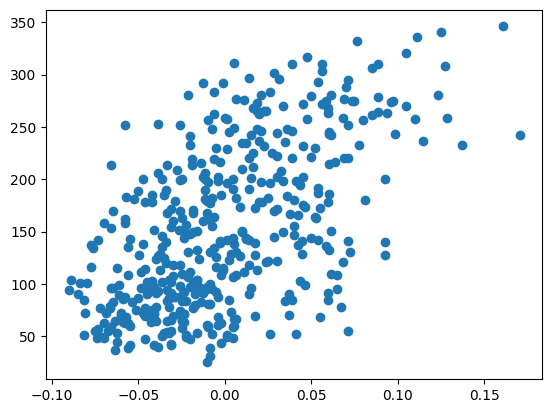

In [61]:
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:,2], diabetes.target) #<< 0~ 여러개 해봤지만 2번째 bmi가 제일 좋은거 같아 2번째껄로 경사하강법을 하는게 좋아보인다 

In [62]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [63]:
# 상관계수
import numpy as np
print(np.corrcoef(diabetes.data[:,1], diabetes.target))
print(np.corrcoef(diabetes.data[:,2], diabetes.target))
print(np.corrcoef(diabetes.data[:,3], diabetes.target))

[[1.       0.043062]
 [0.043062 1.      ]]
[[1.         0.58645013]
 [0.58645013 1.        ]]
[[1.         0.44148176]
 [0.44148176 1.        ]]


---
### 경사 하강법
- 경사하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기(변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

### 예측값 과 변화율
변화율 = 0 : 최적화된 모델, 이에 해당하는 가중치를 찾아야 함 (더이상 변하지 않는? 각도가 0도인?, 변화는게 기울기, 기울기는 변화율)
y - y^ = 0

예측값 (Y^)
: 예측값은 하나의 모델에서 수식의 결과로 나온 값. ( 예측값이 정당값으로 수렴하게 만든다.)

---
## 훈련데이터에서 잘 맞는 w와 b를 찾는 방법
1. 무작위로 w와 b를 정한다. (여기서 무작위는 random을 때려버리라는 얘기가 아니라 임의로 값을 아무거나 정하라는거)    
2. x에서 sample 하나를 선택하여 y^를 계산한다.    
3. y^과 선택한 sample의 진짜 y를 비교한다.(*오차 구하기*)
4. y^이 y와 가까와 지도록 w,b를 조정한다. (*모델 조정하기 : 학습하기*)
5. 모든 sample을 처리할때 까지 2) ~ 4) 항목 반복

In [64]:
# 훈련데이터의 Feature와 Target 정하기
x = diabetes.data[:,2]
y = diabetes.target

# 5개만 출력해보기
print(x[:5])
print(y[:5])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
[151.  75. 141. 206. 135.]


In [65]:
# w와 b를 초기화 하기 : 무작위로 그냥 weight 와 bias를 1로 선택
w = 1.0
b = 1.0

In [66]:
# 훈련데이터의 첫번째 Sample data로 y^ 계산하기
y_hat = x[0] * w + b
y_hat

1.0616962065186832

In [67]:
# Target과 예측 데이터 비교하기
# 3. y^과 선택한 sample의 진짜 y를 비교한다.(*오차 구하기*)
print(y_hat)
print(y[0])

1.0616962065186832
151.0


> 당연한 결과지만 Target과 예측값이 너무 많은 차이가 발생 (오차가 너무 크다)

### 경사 하강법( w값을 조절하기)
: w와 b 를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 살펴보기

In [68]:
# 기존 w에 0.1만 증가해보기
w_inc = w +0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc

1.0678658271705517

In [69]:
# w값 조정한 후 예측값 정도 확인하기
# w가 0.1 증가 했을때 y_hat이 얼마나 증가했는지 계산해보자 (변화율을 확인하기)
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate #= 0.06169620651868429

0.06169620651868429

> w_rate(변화율)이 x[0]의 값과 동일하다.

In [70]:
# 0.1을 올려서 그런가보다 0.2로 한번 올려보자
# 기존 w에 0.1만 증가해보기
w_inc = w +0.2
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate #= 0.06169620651868325

0.06169620651868325

In [71]:
# x[1]로 해보자
w_inc = w +0.1
y_hat = x[1] * w +b
y_hat_inc = w_inc * x[1] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate #= -0.05147406123880089

-0.05147406123880089

In [72]:
# 변화율에 대한 증명이 끝났으니 다시 훈련데이터의 1번째 값으로 변화율을 구해보자
w=b=1
y_hat = x[0] * w +b
w_inc = w +0.1
y_hat_inc = w_inc * x[0] + b


w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate #= -0.05147406123880089

0.06169620651868429

In [73]:
# 변화율로 가중치를 업데이트 하기 <- 학습하기
w_new = w +w_rate
w_new

1.0616962065186843

In [74]:
# 변화율로 절편 업데이트 하기 <- 학습하기
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186833
1.0


### 오차 역전파(backpropagation)

In [75]:
# 오차 역전파로 가중치와 절편을 업데이트 (손실함수(cost function비용함수)를 구성함)
# 오차 역전파는 y^과 y의 차이를 비용하여 w와 b를 업데이트 한다
# 오차와 변화율을 곱하여 가중치를 업데이트 한다

err = y[0] - y_hat
w_new = w + w_rate * err # 이러면 0.1씩 증가 안시키고 한번엦 ㅓㅁ프
b_new = b + b_rate * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [76]:
# 2번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구하기
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new +w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


### 반복문을 통해 전체 샘플을 반복하기

In [77]:
w = b = 1
for x_i, y_i in zip(x,y):
    y_hat = x_i * w +b
    err = y_i - y_hat # 오차구하기
    w_rate = x_i # 변화율
    w = w + w_rate * err
    b = b + 1 * err

print(w,b)

#  첫번째 줄 w=b=1을 지우고 , 애를 또 실행하면 같은 걸로 반복학습 시키는거임

587.8654539985616 99.4093556453094


최종 y = wX + b
에서 w 와 b 의 값을 구한거임

그럼 잘 됬나 그래프로 눈으로 확인

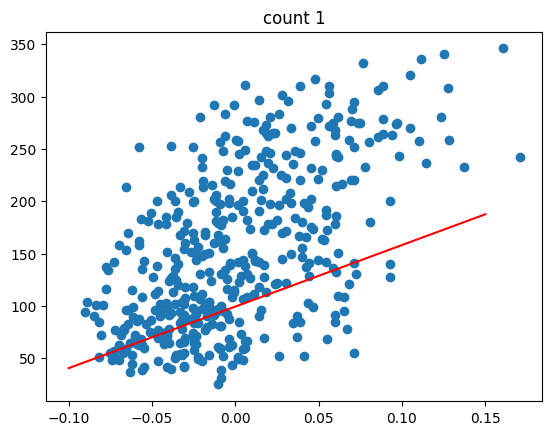

In [78]:
# 기존 꺼
plt.scatter(x,y)

# 산포도의 x측에 범위에 해당하는 값을 대입
pl1 = (-0.1, -0.1*w+b)
pl2 = (0.15, 0.15*w+b)
plt.title('count 1')
plt.plot(
    [pl1[0],pl2[0]],[pl1[1],pl2[1]],'r'
)

plt.show()

### Epoch로 반복하기 : w와 b를 반복적으로 계산하기

In [79]:
w = b = 1

for _ in range(100): #<< 여기는 그냥 반복만 하려고 하는거라 변수에 의미가 없으니까 그때 쓰는녀석이 _ 
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w +b
        err = y_i - y_hat # 오차구하기
        w_rate = x_i # 변화율
        w = w + w_rate * err
        b = b + 1 * err

print(w,b)

#  첫번째 줄 w=b=1을 지우고 , 애를 또 실행하면 같은 걸로 반복학습 시키는거임

913.5973364346786 123.39414383177173


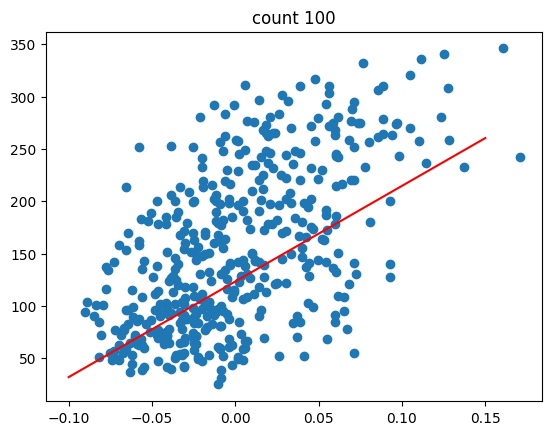

In [80]:
# 기존 꺼
plt.scatter(x,y)

# 산포도의 x측에 범위에 해당하는 값을 대입
pl1 = (-0.1, -0.1*w+b)
pl2 = (0.15, 0.15*w+b)
plt.title('count 100')
plt.plot(
    [pl1[0],pl2[0]],[pl1[1],pl2[1]],'r'
)

plt.show()

In [81]:
w = b = 1

for _ in range(1000): #<< 여기는 그냥 반복만 하려고 하는거라 변수에 의미가 없으니까 그때 쓰는녀석이 _ 
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w +b
        err = y_i - y_hat # 오차구하기
        w_rate = x_i # 변화율
        w = w + w_rate * err
        b = b + 1 * err

print(w,b)

#  첫번째 줄 w=b=1을 지우고 , 애를 또 실행하면 같은 걸로 반복학습 시키는거임

913.5973364346786 123.39414383177173


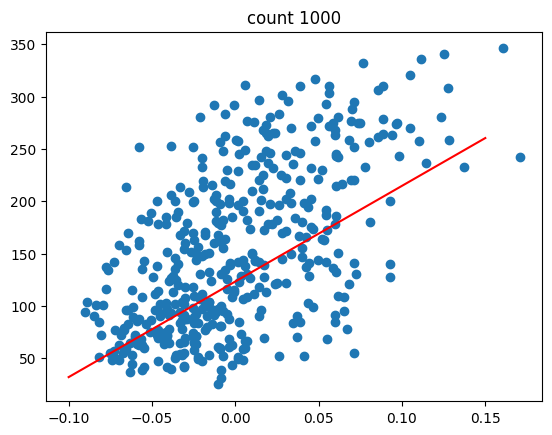

In [82]:
# 기존 꺼
plt.scatter(x,y)

# 산포도의 x측에 범위에 해당하는 값을 대입
pl1 = (-0.1, -0.1*w+b)
pl2 = (0.15, 0.15*w+b)
plt.title('count 1000')
plt.plot(
    [pl1[0],pl2[0]],[pl1[1],pl2[1]],'r'
)

plt.show()

100번이나 1000번 이나 그다지 차이가 없네 최적값을 구했나 보구나 

---
### 모델 만들기 정리

1. w와 b를 임의의 값(1,1)로 초기화 하고 훈련데이터의 샘플을 하나씩 대입하여 y와 y^의 오차를 구한다
2. 1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트 한다 (학습한다)
3. 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트 된다
4. 반대로 y^이 y보다 작으면 오차는 양수가 되어 w와 b는 더 커지도록 업데이트 된다

---
### 선형 회귀를 위한 Class 만들기

In [83]:
class LRModel:
    #초기화 작업
    def __init__(self):
        self.w = 1.0 # 가중치 초기화
        self.b = 1.0 # 절편을 초기화
    # 정방향 계산
    def forpass(self,x):
        y_hat = x * self.w + self.b # 직선방정식을 계산
        return y_hat
    # 역방향 계산 (오차율이 들어감)
    def backprop(self,x,err):
        w_grad = x * err # 가중치에 대한 그레디언트 gradiant 그래프에서 점프 해서 내려혼 경사하강 SGD: Stochastic Gradient Descent
        b_grad = 1 *err #절편에 대한 
        return w_grad, b_grad
    # 훈련
    def fit(self,x,y,epoch): # w,b는 처음에만 1로 초기화 되고 epoch의 크기에 따라 계속 바뀜
        for _ in range(epoch):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                err = (y_i - y_hat)
                w_grad, b_grad = self.backprop(x_i,err)
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b
                
        

In [84]:
lrmodel = LRModel()
w,b = lrmodel.fit(x,y,100)
print(w,b)

913.5973364346786 123.39414383177173


---
# 용어 정리

### 선형회귀
선형방정식을 사용하여 연속적인 값을 예측하는 알고리즘으로 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있다     
머신러닝 알고리즘 이지만 딥러닝 에서 사용하는 인공신경망의 알고리즘의 기초가 된다     


### 경사하강법
최적화 알고리즘 중의 하나로 핵심 훈련알고리즘    
이 방법은 최적의 모델을 만드는 가중치를 한번에 찾지 않는다    
먼저 임의의 정한 가중치에서 출력을 만근 후 타겟 과 비교하여 오차를 줄이는 방향으로 가중치를 조정 한다    
이런 과정의 모둔 훈련 샘플링에 대해서 반복하면서 최적의 가중치를 찾는다     
    

### 손실 함수
모델이 얼마 만큼의 오류가 있는지 측정하는 기준    
함수의 값을 최소로 만드는 것이 이 모델훈련의 목적    
비용함수(cost function)또는 목적함수(objective function) 이라고도 부른다    
